# Project 1
# Numerical Methods for the Linear-Advection Equation

Solve the one-dimensional wave equation

$$
\frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0 
,\quad a = \frac{1}{2}
$$

with

$$
u(x, 0) = \frac{1}{2}(1 + \tanh[250(x - 20)]), \quad 0 \le x \le 40
$$

Choose initially 41 grid point mesh with $\Delta x = 1$ and compute to $t = 10$

## 1.
Solve this problem for all three methods for $\Delta t = 1.0$ and $\Delta t = 0.5$, and compare graphically with the exact stationary solution. Discuss the differences between the various solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# constants
DX = 1
TMAX = 10
A = 0.5
GRID_LENGTH = 40

In [3]:
# Define the initial signal that is being advected
def signal(x):
    tanh = np.tanh(250.0*(x - 20.0))
    return 0.5*(1.0 + tanh)
# Calculate the exact solution at a given time at given positions
def exact(t, dx, extra_width=0):    
    start = A*t
    end = start + GRID_LENGTH
    left = start - extra_width
    right = end + extra_width
    x = np.arange(left, right + dx, dx)
    x_signal_range = np.logical_and(x >= start, x <= end)
    x_signal_offset = x[x_signal_range][0]
    u_exact_signal = np.empty_like(x)
    u_exact_signal[x_signal_range] = signal(x[x_signal_range] - x_signal_offset)
    u_exact_signal[x < start] = u_exact_signal[x_signal_range][0]
    u_exact_signal[x > end] = u_exact_signal[x_signal_range][-1]
    return x,  u_exact_signal

In [4]:
# Initial Conditions
x = np.arange(0, GRID_LENGTH + DX, DX, dtype=float)
u0 = signal(x)

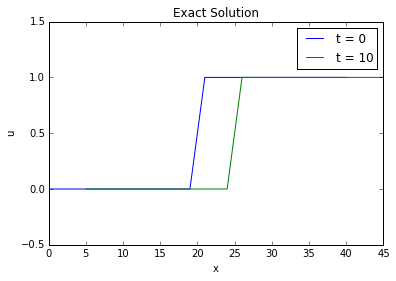

In [6]:
# Exact Solution
plt.plot(x, u0, label='t = 0')
xexact, uexact = exact(10, DX)
plt.plot(xexact, uexact, label='t = 10')
plt.ylim(-0.5, 1.5)
plt.legend()
plt.title('Exact Solution')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

In [72]:
# Schemes: Forward difference in time
def upwind(um, ui, up, dt, dx, u):
    u_new = u.copy()
    u_new[1:-1] = ui - A*(dt/dx)*(ui - um)
    return u_new

def lax_friedrichs(um, ui, up, dt, dx, u):
    u_new = u.copy()
    u_new[1:-1] = 0.5*(up + um) - A*0.5*(dt/dx)*(up - um) 
    return u_new
    
def lax_wendroff(um, ui, up, dt, dx, u):
    u_new = u.copy()
    u_new[1:-1] = (ui 
            - 0.5*(dt/dx)*A*(up - um) 
            + 0.5*(dt/dx*A)**2*(up - 2*ui + um))
    return u_new

def mccormack(um, ui, up, dt, dx, u):
    u_bar = u.copy()
    u_bar[:-1] = u[:-1] - 0.5*A*(dt/dx)*(u[1:] - u[:-1])
    u_new = u.copy()
    u_new[1:] = 0.5*(
            u[1:] + u_bar[1:] 
            - A*(dt/dx)*(u_bar[1:] - u_bar[:-1]))
    return u_new
    
def time_step(u, dt, dx, scheme):
    """Generic forward difference time step iteration."""
    u = u.copy()
    ui = u[1:-1]
    um = u[:-2]
    up = u[2:]
    u_new = scheme(um, ui, up, dt, dx, u)
    return u_new

def solve(scheme, dt, dx):
    tsteps = int(TMAX/dt)
    u = np.zeros((tsteps, len(x)))
    u[0] = u0
    for i in range(tsteps - 1):
        u[i + 1] = time_step(u[i], dt, dx, scheme)
    return u

In [73]:
def leap_frog(dt, dx):
    def timestep(u_jm1, u_j):
        u_new = u_j.copy()
        u_new[1:-1] = (
                u_jm1[1:-1] 
                - A*(dt/dx)*(u_j[2:] - u_j[:-2]))
        return u_new
    
    trange = range(0, TMAX + dt, dt)
    tsteps = len(trange)
    u = np.zeros((tsteps, len(x)))
    u[0] = u0
    u[1] = timestep(u[0], u[0])
    for i in range(1, tsteps - 1):
        u[i + 1] = timestep(u[i - 1], u[i])
    return u

In [79]:
def plot_exact(ax):
    ax.plot(xexact, uexact, label='Exact')
def plot_options(ax, title):
    ax.set_title('%s' % title)
    ax.set_xlim(15, 35)
    ax.set_ylim(-0.5, 1.5)
    ax.legend(loc='best', fancybox=True)

In [80]:
dts = [0.5, 1]

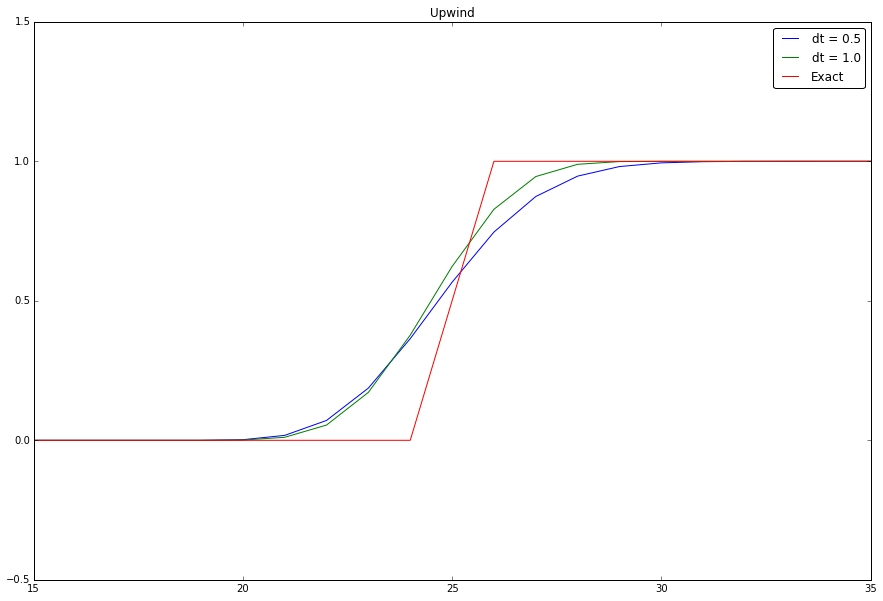

In [90]:
scheme = upwind
title = 'Upwind'
fig, ax = plt.subplots(figsize=(15, 10))
for dt in dts:
    u = solve(scheme, dt, DX)
    ax.plot(x, u[-1], label='dt = %.1f' % dt)
plot_exact(ax)
plot_options(ax, title)

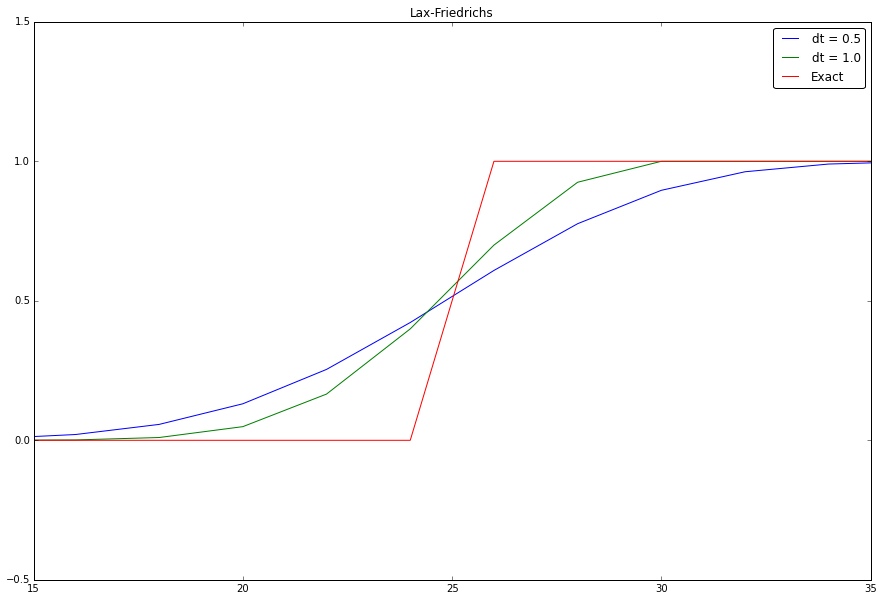

In [91]:
scheme = lax_friedrichs
title = 'Lax-Friedrichs'
fig, ax = plt.subplots(figsize=(15, 10))
for dt in dts:
    u = solve(scheme, dt, DX)
    ax.plot(x, u[-1], label='dt = %.1f' % dt)
plot_exact(ax)
plot_options(ax, title)

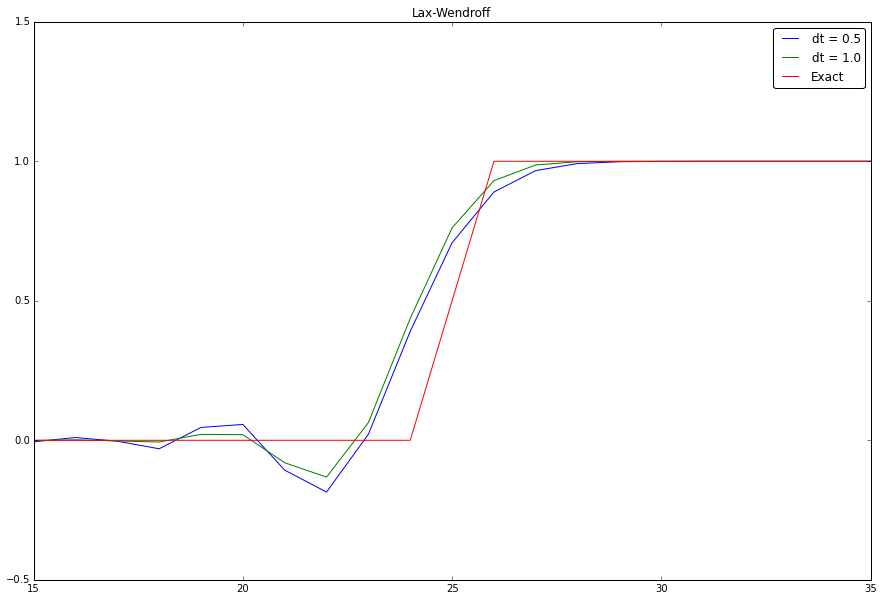

In [92]:
scheme = lax_wendroff
title = 'Lax-Wendroff'
fig, ax = plt.subplots(figsize=(15, 10))
for dt in dts:
    u = solve(scheme, dt, DX)
    ax.plot(x, u[-1], label='dt = %.1f' % dt)
plot_exact(ax)
plot_options(ax, title)

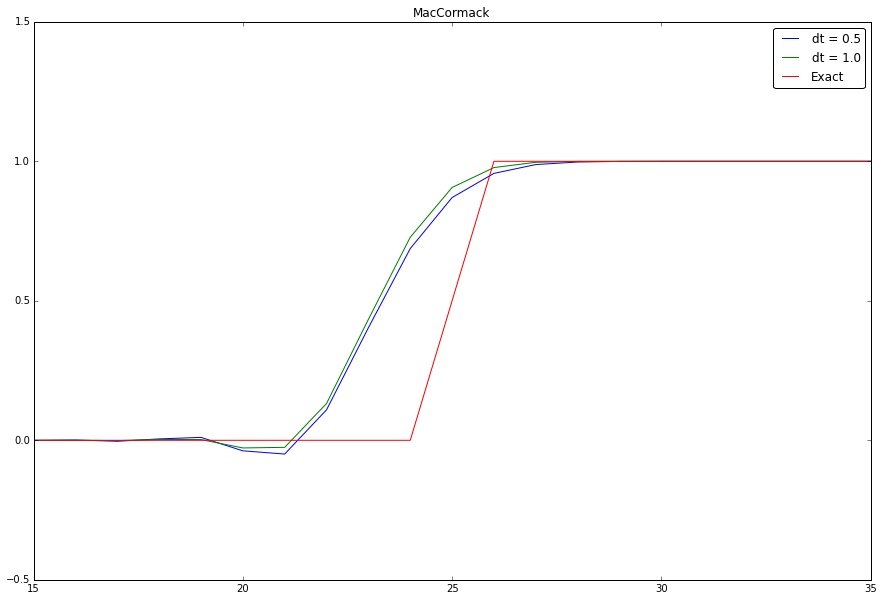

In [93]:
scheme = mccormack
title = 'MacCormack'
fig, ax = plt.subplots(figsize=(15, 10))
for dt in dts:
    u = solve(scheme, dt, DX)
    ax.plot(x, u[-1], label='dt = %.1f' % dt)
plot_exact(ax)
plot_options(ax, title)

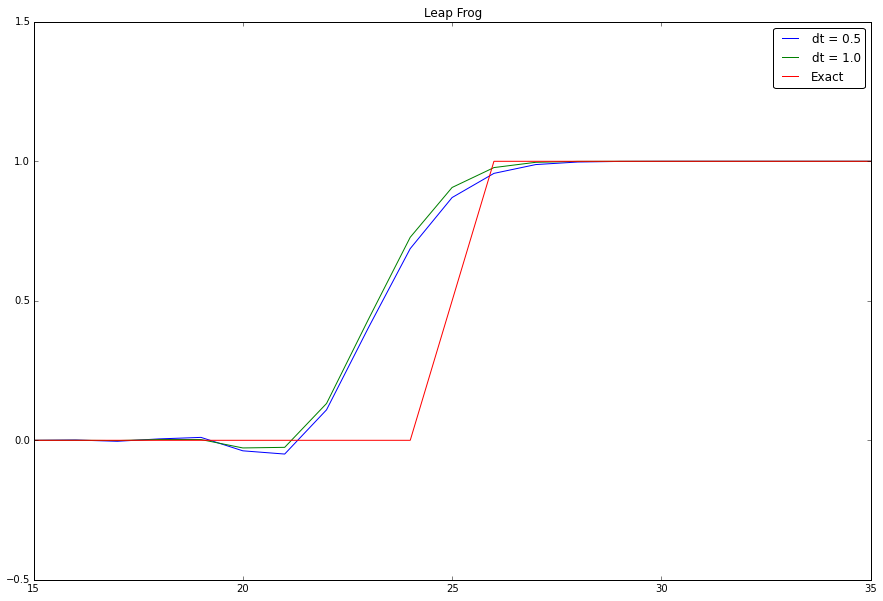

In [94]:
u = leap_frog(dt, DX)
title = 'Leap Frog'
fig, ax = plt.subplots(figsize=(15, 10))
for dt in dts:
    u = solve(scheme, dt, DX)
    ax.plot(x, u[-1], label='dt = %.1f' % dt)
plot_exact(ax)
plot_options(ax, title)